In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import numpy as np
import os
from sqlalchemy import create_engine
import seaborn as sns
import datetime as dt
sns.set()

In [1]:
color_y ='#0B3E7E'
color_r = '#920D03'
color_b = '#0B7A50'
redye = [color_r, color_y, color_b]

In [3]:
driver = 'mysql+pymysql:'
user = 'root'
password = '19693903'
ip = '127.0.0.1'
database = 'project_4'

In [4]:
connection_string = f'{driver}//{user}:{password}@{ip}/{database}'
engine = create_engine(connection_string)

In [5]:
query = """
SELECT *
FROM flights
"""

In [6]:
query2 = """
SELECT * FROM airports
"""

In [7]:
airports_info = pd.read_sql(query2, engine)
flights = pd.read_sql(query, engine)

In [8]:
data = flights.merge(airports_info, left_on = 'depart_airpt', right_on='iata_code')

In [9]:
data = data.drop(columns = ('iata_code'), axis = 1).rename(columns = {'country_code':'depart_country'})
data = data.astype({'depart_delay': int,'arri_delay':int})
data['Total_delay'] = data['depart_delay'] + data['arri_delay']


In [10]:
q1, q3= np.percentile(data['Total_delay'],[25,75])
iqr = q3 - q1
upper_bound = q3 +(3.5 * iqr)
upper_bound

149.5

In [11]:
data = data[data['Total_delay'] <= upper_bound]

## Distributions and summary statistics

#### Distribution of departure and arrival delays

In [12]:
## Filtering the data to obtain only Spain observations

data_bcn = data[data['depart_airpt'] == 'BCN']

In [13]:
bnc_delays =  data_bcn[np.logical_and(data_bcn['depart_delay']>0, data_bcn['arri_delay']>0)]

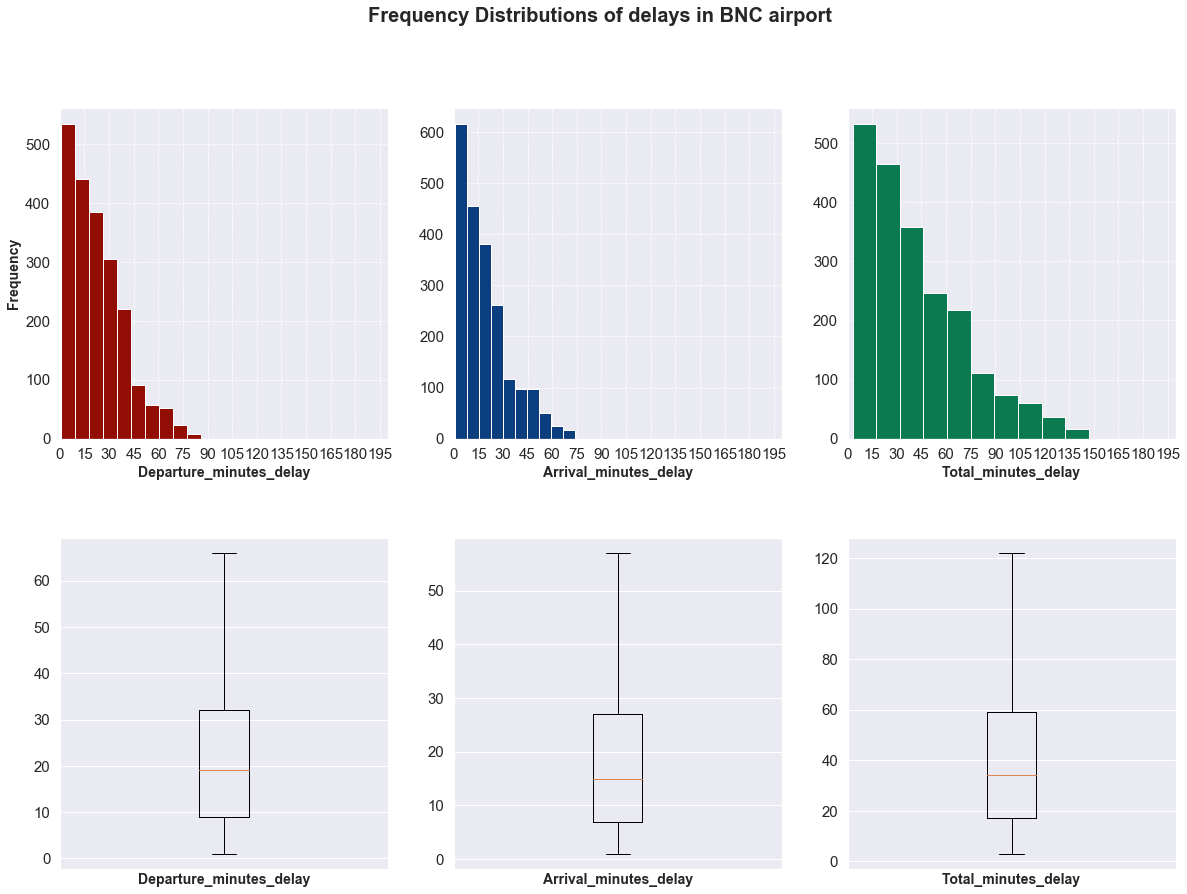

In [97]:
fig, [ax1, ax2] = plt.subplots(2,3, figsize=[20,14])
fig.subplots_adjust(hspace=0.3)
fig.suptitle('Frequency Distributions of delays in BNC airport', fontweight = 900, fontsize = 20)

ax1[0].hist(bnc_delays.depart_delay,bins=10, color=color_r)
ax1[0].set_xlabel('Departure_minutes_delay',fontweight = 900, fontsize = 14)
ax1[0].set_ylabel('Frequency',fontweight = 900, fontsize = 14)
ax1[0].grid(linestyle='--', linewidth=0.8)
ax1[0].set_xlim([0, 200])
ax1[0].tick_params(axis="x", labelsize=15)
ax1[0].tick_params(axis="y", labelsize=15)
ax1[0].set_xticks(np.arange(0, 200,15))

ax1[1].hist(bnc_delays.arri_delay, bins=10, color=color_y)
ax1[1].set_xlabel('Arrival_minutes_delay',fontweight = 900, fontsize = 14)
ax1[1].grid(linestyle='--', linewidth=0.8)
ax1[1].set_xlim([0, 200])
ax1[1].tick_params(axis="x", labelsize=15)
ax1[1].tick_params(axis="y", labelsize=15)
ax1[1].set_xticks(np.arange(0, 200,15))

ax1[2].hist(bnc_delays.Total_delay, bins=10, color=color_b)
ax1[2].set_xlabel('Total_minutes_delay',fontweight = 900, fontsize = 14)
ax1[2].grid(linestyle='--', linewidth=0.8)
ax1[2].set_xlim([0, 200])
ax1[2].tick_params(axis="x", labelsize=15)
ax1[2].tick_params(axis="y", labelsize=15)
ax1[2].set_xticks(np.arange(0, 200,15))

ax2[0].boxplot(bnc_delays.depart_delay, bootstrap=10000, meanline = True,showfliers=False)
ax2[0].set_xlabel('Departure_minutes_delay',fontweight = 900, fontsize = 14)
ax2[0].set_xticks([])
ax2[0].tick_params(axis="x", labelsize=15)
ax2[0].tick_params(axis="y", labelsize=15)

ax2[1].boxplot(bnc_delays.arri_delay, bootstrap=10000, meanline = True,showfliers=False)
ax2[1].set_xlabel('Arrival_minutes_delay',fontweight = 900, fontsize = 14)
ax2[1].set_xticks([])
ax2[1].tick_params(axis="x", labelsize=15)
ax2[1].tick_params(axis="y", labelsize=15)

ax2[2].boxplot(bnc_delays.Total_delay, bootstrap=10000, meanline = True,showfliers=False)
ax2[2].set_xlabel('Total_minutes_delay',fontweight = 900, fontsize = 14)
ax2[2].set_xticks([])
ax2[2].tick_params(axis="x", labelsize=15)
ax2[2].tick_params(axis="y", labelsize=15)
plt.savefig("freq_delays_bcn.png")

plt.show()

In [15]:
bnc_delays.describe()

,depart_delay,arri_delay,Total_delay
count,2117.000000,2117.000000,2117.000000
mean,22.641001,19.144072,41.785073
std,16.338185,15.250353,30.062421
min,1.000000,1.000000,3.000000
25%,9.000000,7.000000,17.000000
50%,19.000000,15.000000,34.000000
75%,32.000000,27.000000,59.000000
max,86.000000,74.000000,147.000000


In [16]:
bnc_dep_delay_mean = bnc_delays.depart_delay.mean()
bnc_dep_delay_std = bnc_delays.depart_delay.std()
bnc_dep_delay_var = bnc_delays.depart_delay.var()

bnc_arrv_delay_mean = bnc_delays.arri_delay.mean()
bnc_arrv_delay_std = bnc_delays.arri_delay.std()
es_arrv_delay_var = bnc_delays.arri_delay.var()

bnc_total_delay_mean = bnc_delays.Total_delay.mean()
bnc_total_delay_std = bnc_delays.Total_delay.std()
bnc_total_delay_var = bnc_delays.Total_delay.var()

### Distributions of flights during the day in BNC

In [17]:
depart_hours = data_bcn['schd_depart_time'].dt.hour
arri_hours = data_bcn['schd_arri_time'].dt.hour

df_hours_bcn = pd.DataFrame([depart_hours, arri_hours])
df_hours_bcn = df_hours_bcn.transpose()

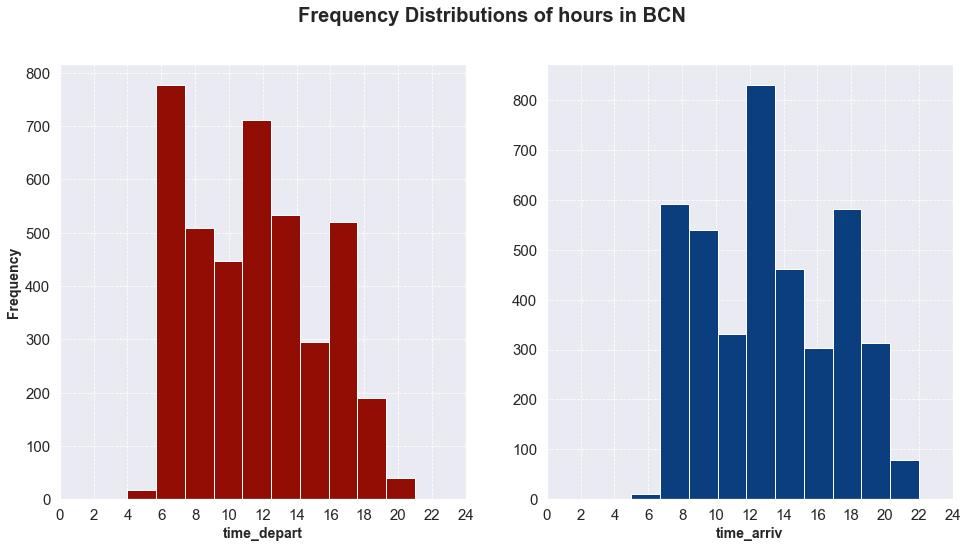

In [98]:
fig, [ax1, ax2] = plt.subplots(1,2, figsize=[16,8])
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Frequency Distributions of hours in BCN', fontweight = 900, fontsize = 20)

ax1.hist(depart_hours, color=color_r)
ax1.set_xlabel('time_depart',fontweight = 900, fontsize = 14)
ax1.set_ylabel('Frequency',fontweight = 900, fontsize = 14)
ax1.grid(linestyle='--', linewidth=0.8)
ax1.set_xticks(np.arange(0, 26,2))
ax1.tick_params(axis="y", labelsize=15)
ax1.tick_params(axis="x", labelsize=15)

ax2.hist(arri_hours,color=color_y)
ax2.set_xlabel('time_arriv',fontweight = 900, fontsize = 14)
ax2.grid(linestyle='--', linewidth=0.8)
ax2.set_xticks(np.arange(0, 26,2))
ax2.tick_params(axis="y", labelsize=15)
ax2.tick_params(axis="x", labelsize=15)
plt.savefig("freq_daytime_bcn.png")
plt.show()

### Airlines flights distributions in BNC

In [19]:
bcn_airlines = data_bcn.groupby('airln_name').count()

In [20]:
bcn_airlines = bcn_airlines.sort_values(by=['airln_code'],ascending=False).drop(bcn_airlines.iloc[:,1:], axis=1).\
rename(columns = {'airln_code':'total_count'}).reset_index(drop=False)

In [21]:
bcn_airlines = bcn_airlines[bcn_airlines['total_count']>50]

In [22]:
bcn_airlines['per'] = bcn_airlines['total_count'] / bcn_airlines['total_count'].sum()

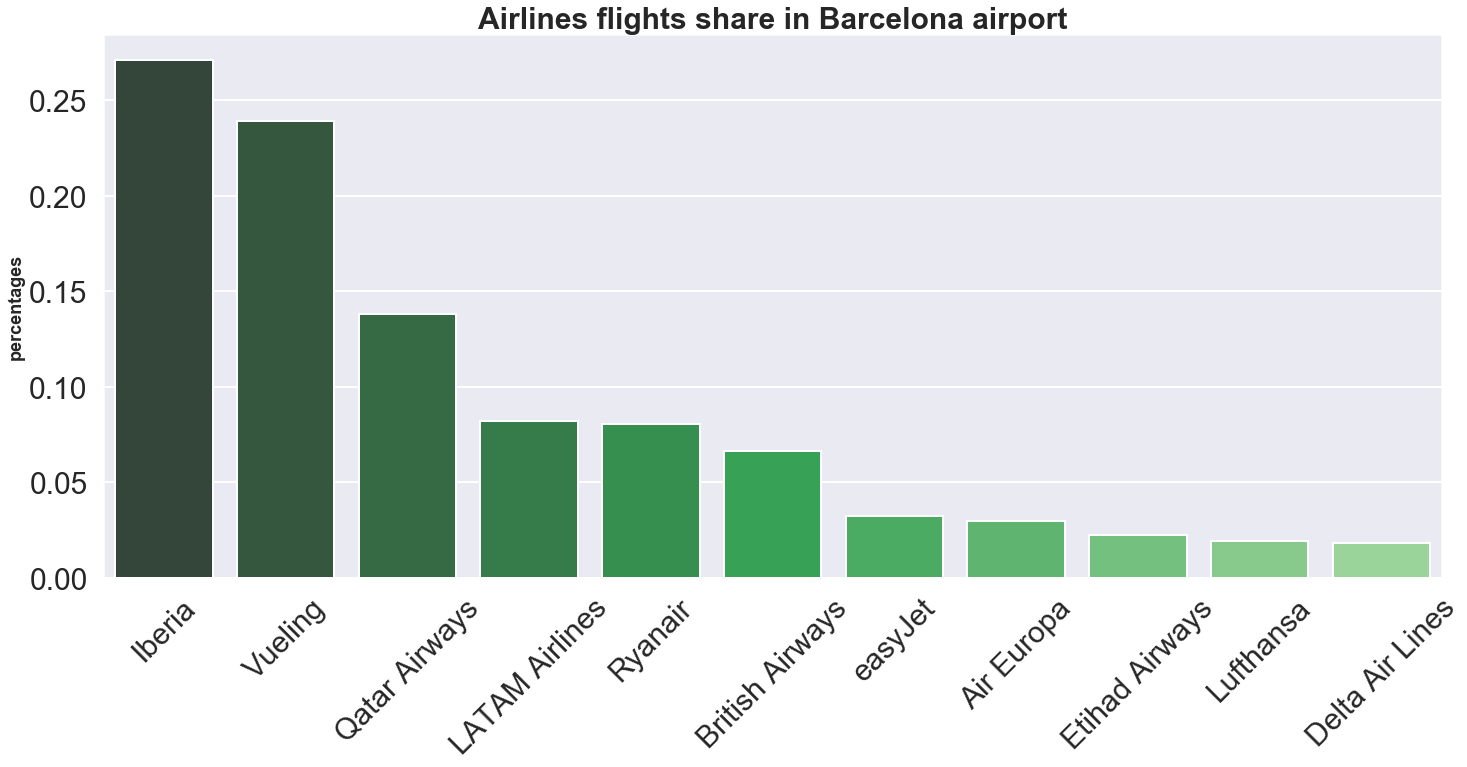

In [123]:
fig, ax1 = plt.subplots(figsize=(24,10))
ax1 = sns.barplot(bcn_airlines.airln_name, bcn_airlines.per, palette='Greens_d', saturation=2)
plt.title("Airlines flights share in Barcelona airport",  fontweight = 900, fontsize = 30)
ax1.set_xlabel('',fontweight = 900, fontsize = 14)
ax1.set_ylabel('percentages',fontweight = 900, fontsize = 18)
plt.xticks(fontsize = 30, rotation=45)
plt.yticks(fontsize = 30)
sns.set_context("poster")
plt.savefig("market_share_bcn.png")

## Delays by weekday

In [24]:
import datetime as dt

dayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
data_bcn['weekday'] = data_bcn['schd_depart_time'].dt.dayofweek.map(dayOfWeek)
data_bcn['weekday_num'] = data_bcn['schd_arri_time'].dt.dayofweek

/Users/abreualberto91/anaconda3/envs/ironhack/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/abreualberto91/anaconda3/envs/ironhack/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [25]:
bcn_delay_day = data_bcn.groupby('weekday').mean().reset_index(drop=False).drop('weekday_num', axis=1)

In [26]:
tidy = bcn_delay_day.melt(id_vars='weekday').rename(columns=str.title)
tidy.columns = ['Weekday', 'Type', 'Mean delay time']

In [106]:
index = ['Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday']


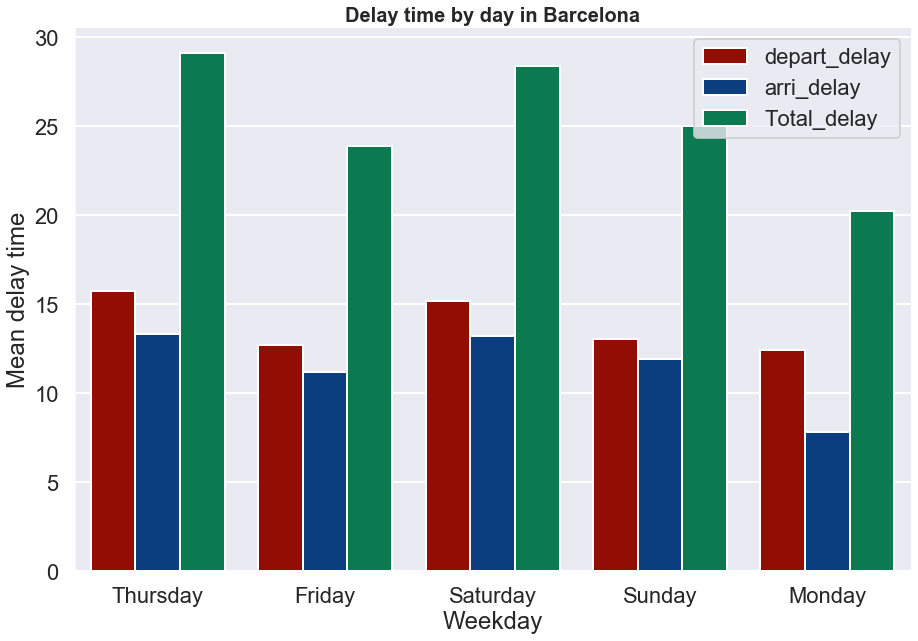

In [111]:
fig, ax1 = plt.subplots(figsize=(15,10))
sns.barplot(x='Weekday', y='Mean delay time', hue='Type', data=tidy, ax=ax1, palette=redye, saturation=1, order=index)
plt.title('Delay time by day in Barcelona',fontweight = 900, fontsize = 20)
plt.legend()
sns.despine(fig)
plt.savefig("delay_weekday_bcn.png")



In [28]:
weekday_delays = data_bcn[['weekday', 'depart_delay', 'arri_delay','Total_delay']]
weekday_delays = weekday_delays[np.logical_and(weekday_delays['depart_delay']>0, weekday_delays['arri_delay']>0)]

In [29]:
tidy_2 = weekday_delays.melt(id_vars='weekday').rename(columns=str.title)
tidy_2.columns = ['Weekday', 'Type', 'Delay in minutes']

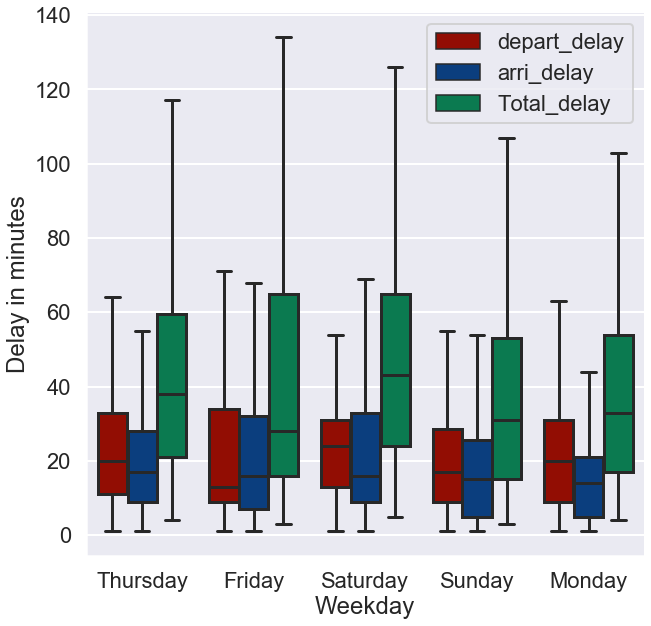

In [112]:
fig, ax1 = plt.subplots(figsize=(10,10))
ax = sns.boxplot(x='Weekday', y='Delay in minutes', hue='Type',ax=ax1,
                 data=tidy_2, palette=redye,showfliers=False, saturation = 1, order=index)

ax.legend()
sns.despine(fig)
plt.savefig("delay_weekday__box_bcn.png")
plt.show()

## Relation between minutes of delay and day time

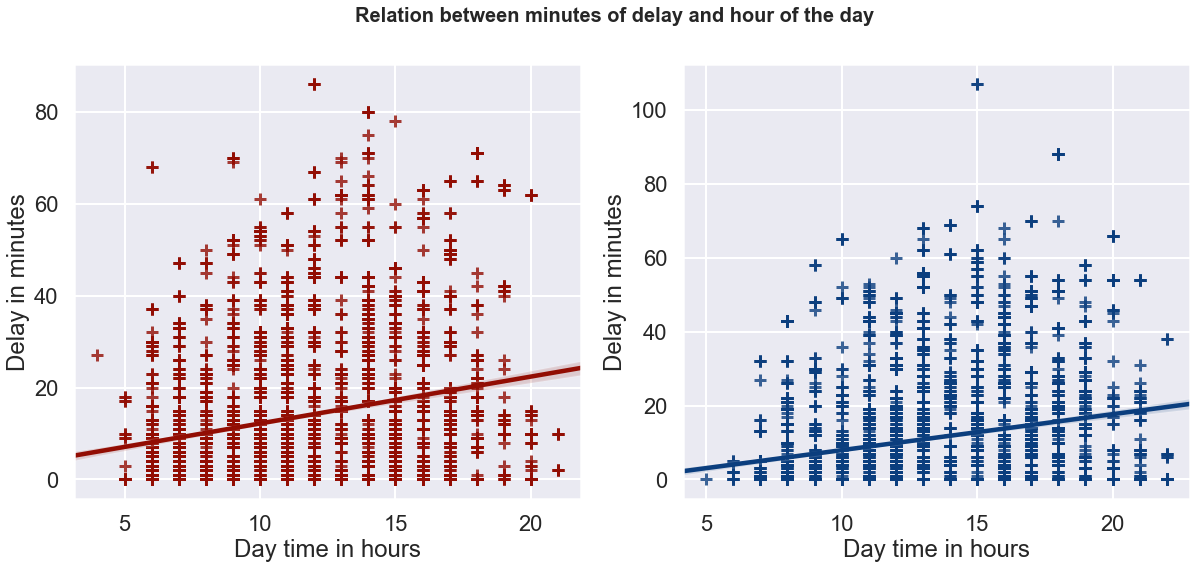

In [113]:
fig, ax1 = plt.subplots(1,2, figsize=[20,8])
fig.subplots_adjust(hspace=0.3)

sns.regplot(depart_hours, data_bcn.depart_delay, fit_reg=True, color=color_r, marker="+", label='departure', ax = ax1[0])
sns.regplot(arri_hours, data_bcn.arri_delay, fit_reg=True, color=color_y,marker="+", label='arrival', ax=ax1[1])

plt.suptitle('Relation between minutes of delay and hour of the day',fontweight = 900, fontsize = 20)
ax1[0].set_xlabel('Day time in hours')
ax1[0].set_ylabel('Delay in minutes')
ax1[1].set_xlabel('Day time in hours')
ax1[1].set_ylabel('Delay in minutes')
plt.savefig("rel_delays_hours_bcn.png")
plt.show()

### Relation between delays and total delay

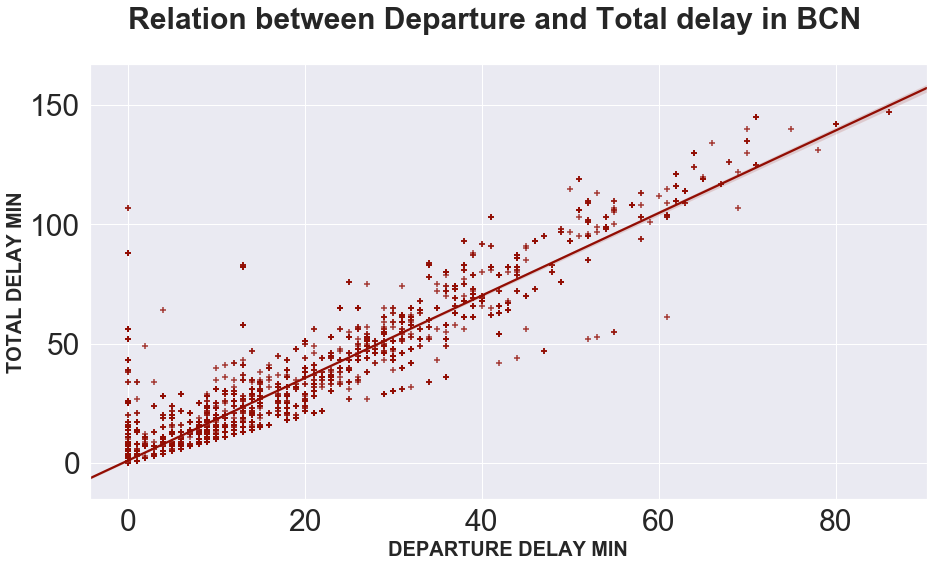

In [120]:
sns.set(font_scale=1.5)
fig,ax = plt.subplots(figsize=(15,8))
fig.suptitle('Relation between Departure and Total delay in BCN', fontweight = 900, fontsize = 30)
ax1 = sns.regplot(data_bcn.depart_delay, data_bcn.Total_delay, fit_reg=True, color=color_r, marker="+")
ax1.set(ylabel='Total delay (min)', xlabel='Departure delay (min)')
ax1.tick_params(axis="x", labelsize=30)
ax1.tick_params(axis="y", labelsize=30)
ax1.set_ylabel('TOTAL DELAY MIN',fontweight = 900, fontsize = 20)
ax1.set_xlabel('DEPARTURE DELAY MIN',fontweight = 900, fontsize = 20)

plt.savefig("relation_total_departure_delay.png")

plt.show()

In [124]:
data_bcn.depart_delay.corr(data_bcn.Total_delay)

0.9378717285643905

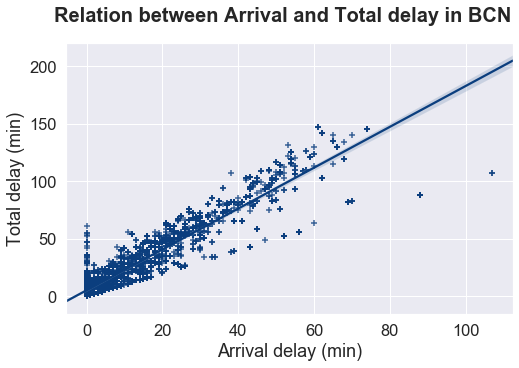

In [114]:
sns.set(font_scale=1.5)
fig,ax = plt.subplots(figsize=(8,5))
fig.suptitle('Relation between Arrival and Total delay in BCN', fontweight = 900, fontsize = 20)
ax1 = sns.regplot(data_bcn.arri_delay, data_bcn.Total_delay, fit_reg=True, color=color_y, marker="+")
ax1.set(ylabel='Total delay (min)', xlabel='Arrival delay (min)')
plt.savefig("relation_total_arrival_bcn.png")

plt.show()

### Relation between delay in departures and arrival delays

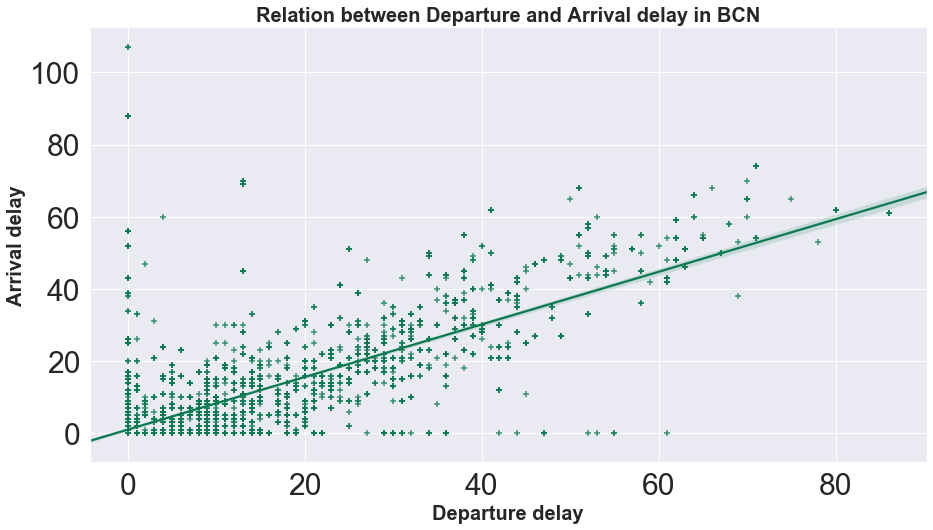

In [115]:
sns.set(font_scale=1.5)
fig,ax = plt.subplots(figsize=(15,8))
ax1 =sns.regplot(data_bcn.depart_delay, data_bcn.arri_delay, fit_reg=True, color=color_b, marker="+")
ax1.set(ylabel='Arrival delay (min)', xlabel='Departure delay (min)')
ax1.tick_params(axis="x", labelsize=30)
ax1.tick_params(axis="y", labelsize=30)
ax1.set_ylabel('Arrival delay',fontweight = 900, fontsize = 20)
ax1.set_xlabel('Departure delay',fontweight = 900, fontsize = 20)


plt.title('Relation between Departure and Arrival delay in BCN',fontweight = 900, fontsize = 20)
plt.savefig("relation_departure_arrival_bcn.png")

plt.show()

### Delay time for the airlines with more flights

In [35]:
query2 = '''
SELECT airln_name, AVG(depart_delay) AS mean_depart_delay, AVG(arri_delay) AS mean_arriv_delay
FROM flights
WHERE airln_name IN ('Iberia', 'Vueling', 'Ryanair', 'Qatar Airways', 'Air Europe', 'easyJet', 'Etihad Airways')
AND depart_airpt = 'BCN'
GROUP BY airln_name
ORDER BY mean_depart_delay DESC

'''

In [57]:
bcn_airlines_delays_top = pd.read_sql(query2, engine)

In [58]:
bcn_airlines_delays_top['Total_mean_delay'] = bcn_airlines_delays_top['mean_depart_delay'] + \
                        bcn_airlines_delays_top['mean_arriv_delay']

bcn_airlines_delays_top = bcn_airlines_delays_top.sort_values(by='Total_mean_delay', ascending=False)

In [163]:
top_airlines = ['Iberia', 'Vueling', 'Ryanair', 'Qatar Airways', 'Air Europe', 'easyJet', 'Etihad Airways']

In [164]:
bcn_airlns_dels_top = data_bcn[data_bcn['airln_name'].isin(top_airlines)]

In [165]:
bcn_airlns_dels_top = bcn_airlns_dels_top[np.logical_and(bcn_airlns_dels_top['depart_delay']>0,\
                                                         bcn_airlns_dels_top['arri_delay']>0)]


In [166]:
bcn_airlns_dels_top = bcn_airlns_dels_top[['airln_name','depart_delay', 'arri_delay','Total_delay' ]]

In [167]:
bcn_airlns_dels_top = bcn_airlns_dels_top.sort_values('Total_delay', ascending = False)

In [168]:
tidy_4 = bcn_airlns_dels_top.melt(id_vars='airln_name').rename(columns=str.title)

In [161]:
tidy_4 = tidy_4.sort_values('Mean delay time', ascending=False)

In [60]:
#Worst airlines in Spain filter by delays

bcn_airlines_delays = data_bcn.groupby('airln_name').mean().reset_index(drop=False).drop('weekday_num', axis=1)
bcn_airlines_delays_worst = bcn_airlines_delays[bcn_airlines_delays['Total_delay']>60]

bcn_airlines_delays_worst = bcn_airlines_delays_worst.sort_values(by='Total_delay', ascending=False)
tidy_3 = bcn_airlines_delays_worst.melt(id_vars='airln_name').rename(columns=str.title)


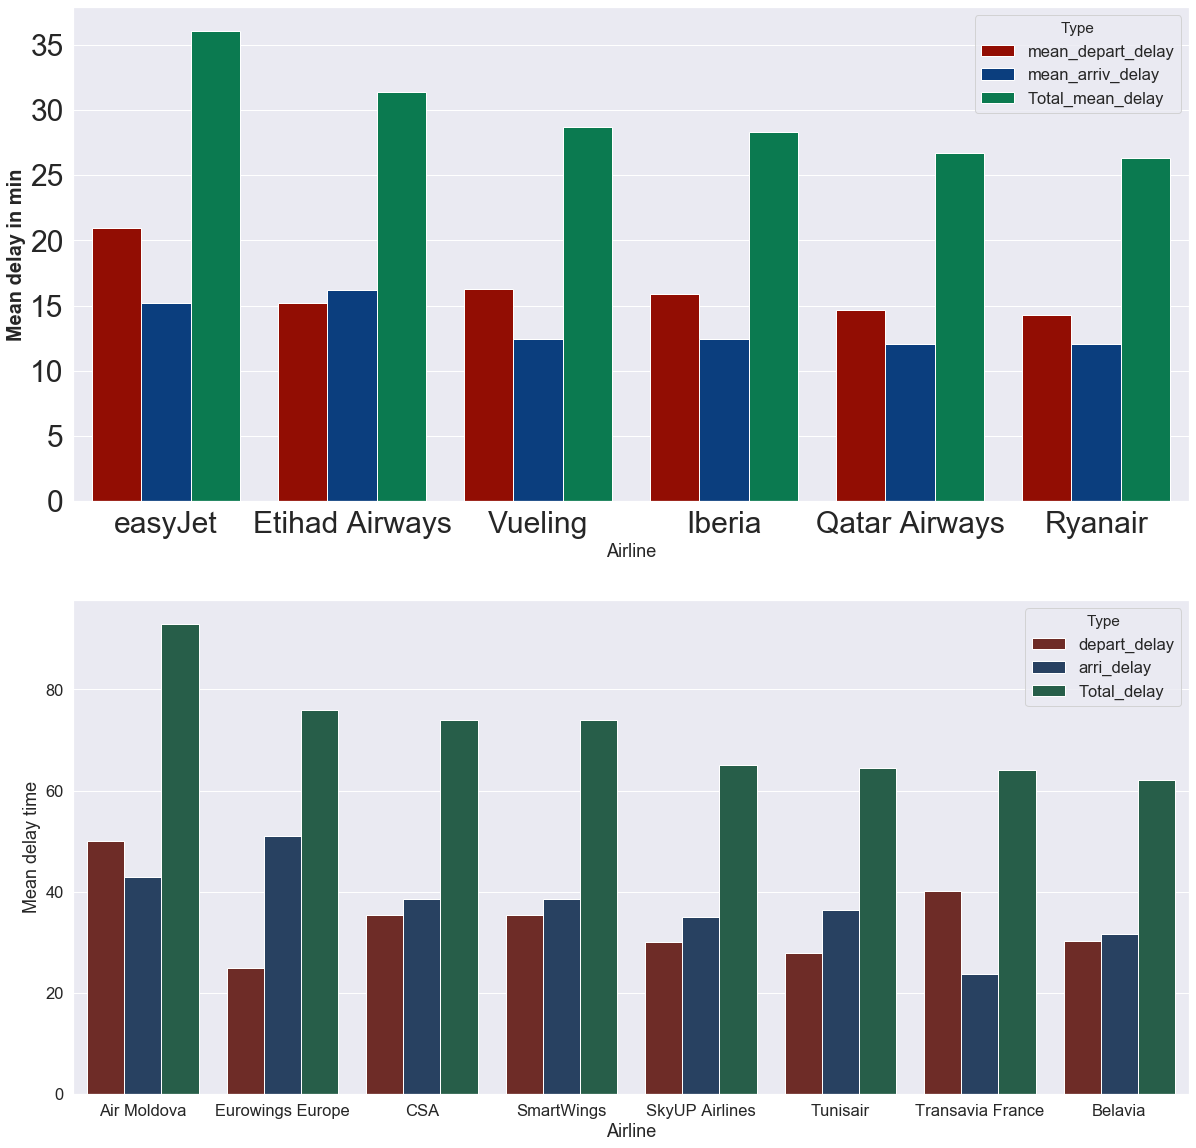

In [116]:
fig, [ax1, ax2] = plt.subplots(2,1,figsize=(20,20))
fig.subplots_adjust(hspace=0.2)

tidy_4.columns = ['Airline', 'Type', 'Mean delay time']
tidy_3.columns = ['Airline', 'Type', 'Mean delay time']
sns.barplot(x='Airline', y='Mean delay time', hue='Type', data=tidy_4, ax=ax1, palette=redye, saturation=1)
ax1.tick_params(axis="x", labelsize=30)
ax1.tick_params(axis="y", labelsize=30)
ax1.set_ylabel('Mean delay in min',fontweight = 900, fontsize = 20)


sns.barplot(x='Airline', y='Mean delay time', hue='Type', data=tidy_3, ax=ax2, palette=redye, saturation=0.5)
plt.savefig("delay_airlines_bcn.png")


plt.show()

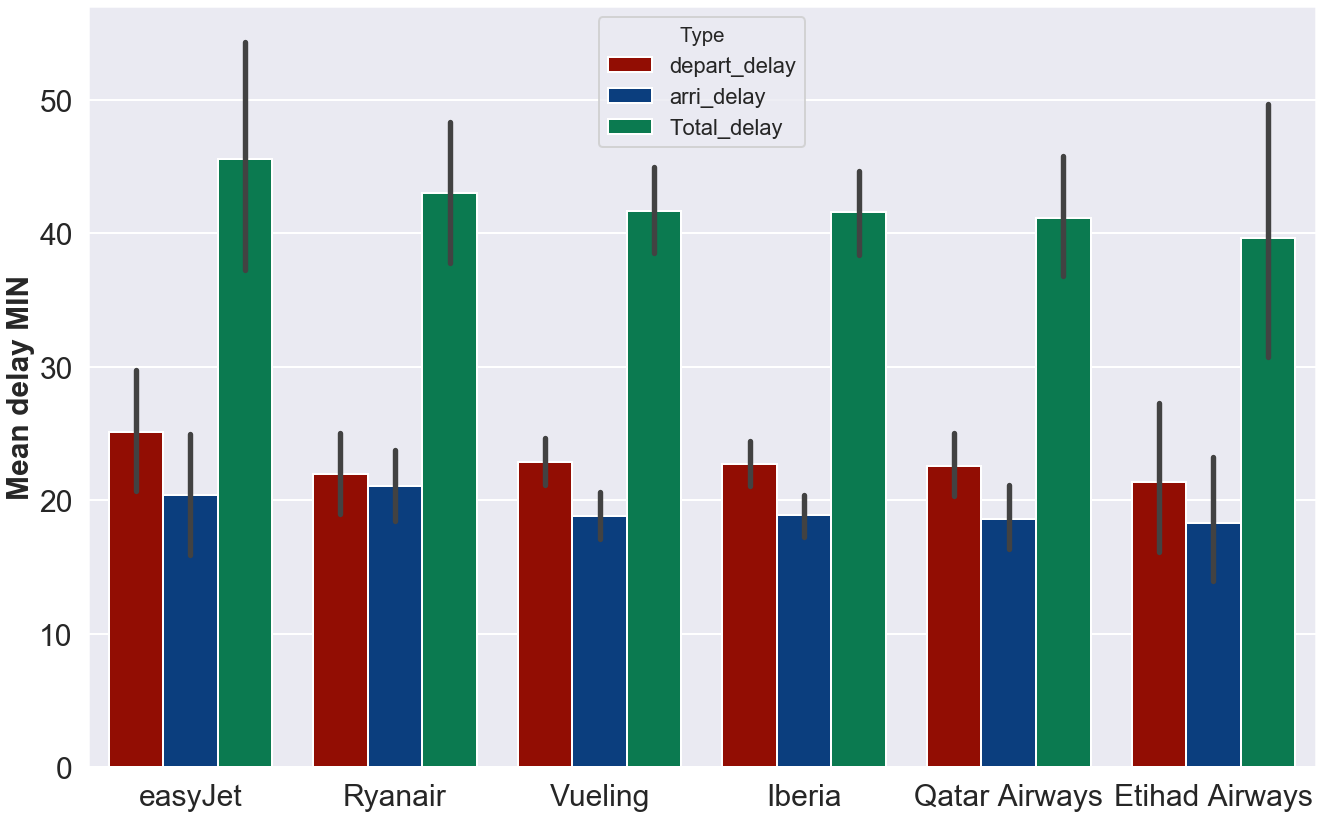

In [171]:
fig, ax1 = plt.subplots(1,1,figsize=(22,14))
fig.subplots_adjust(hspace=0.2)

order = ['easyJet','Ryanair','Vueling','Iberia', 'Qatar Airways','Etihad Airways']
tidy_4.columns = ['Airline', 'Type', 'Mean delay time']

sns.barplot(x='Airline', y='Mean delay time', hue='Type', data=tidy_4, ax=ax1, palette=redye, saturation=1, order=order)
ax1.tick_params(axis="x", labelsize=30)
ax1.tick_params(axis="y", labelsize=30)
ax1.set_xlabel('')
ax1.set_ylabel('Mean delay MIN', fontweight = 900, fontsize = 30)


plt.savefig("delay_airlines_bcn.png")

